# **Customer Segmentation for Personalized Marketing Strategies**

by Lau Wen Jun

# Table of Contents
1. [Background](#Background)
2. [Problem Statement](#Problem-Statement)
3. [Variables](#Variables)
4. [Feature Scaling & Encoding](#Feature-Scaling--Encoding)
   - 4.1. [Feature Scaling (Standardization)](#Feature-Scaling-Standardization)
   - 4.2. [Encoding Categorical Variables](#Encoding-Categorical-Variables)
   - 4.3. [Transformed Data Output](#Transformed-Data-Output)
5. [K-Means Clustering](#K-Means-Clustering)
   - 5.1. [Rule of Thumb: Estimating K Using the Square Root Rule](#Rule-of-Thumb-Estimating-K-Using-the-Square-Root-Rule)
   - 5.2. [Elbow Method](#Elbow-Method)
   - 5.3. [Silhouette Score](#Silhouette-Score)
   - 5.4. [Silhouette Plots](#Silhouette-Plots)
     - 5.4.1. [K=2](#K=2)
     - 5.4.2. [K=3 to K=5](#K=3-to-K=5)
     - 5.4.3. [K=6 to K=10](#K=6-to-K=10)
     - 5.4.4. [K=11](#K=11)
   - 5.5. [Optimal K](#Optimal-K)
6. [Cluster Analysis](#Cluster-Analysis)
   - 6.1. [3D Visualization of Customer Segmentation Using PCA](#3D-Visualization-of-Customer-Segmentation-Using-PCA)
   - 6.2. [Cluster Distribution](#Cluster-Distribution)
   - 6.3. [Customer Behaviour Analysis](#Customer-Behaviour-Analysis)
     - 6.3.1. [Cluster 1: Premium Online Shoppers - Clothing Enthusiasts](#Cluster-1-Premium-Online-Shoppers---Clothing-Enthusiasts)
     - 6.3.2. [Cluster 2: In-Store Home & Kitchen Shoppers - Budget-Conscious](#Cluster-2-In-Store-Home--Kitchen-Shoppers---Budget-Conscious)
     - 6.3.3. [Cluster 3: Young Online Shoppers - Clothing & Beauty Lovers](#Cluster-3-Young-Online-Shoppers---Clothing--Beauty-Lovers)
     - 6.3.4. [Cluster 4: In-Store Electronics & Home & Kitchen Buyers - Basic Subscribers](#Cluster-4-In-Store-Electronics--Home--Kitchen-Buyers---Basic-Subscribers)
     - 6.3.5. [Cluster 5: In-Store Clothing & Home Buyers - Standard Subscribers](#Cluster-5-In-Store-Clothing--Home-Buyers---Standard-Subscribers)
     - 6.3.6. [Cluster 6: Tech-Savvy Budget Shoppers](#Cluster-6-Tech-Savvy-Budget-Shoppers)
     - 6.3.7. [Cluster 7: Home & Kitchen Enthusiasts](#Cluster-7-Home--Kitchen-Enthusiasts)
     - 6.3.8. [Cluster 8: Premium Household Buyers](#Cluster-8-Premium-Household-Buyers)
     - 6.3.9. [Cluster 9: Digital Fashion Shoppers](#Cluster-9-Digital-Fashion-Shoppers)
     - 6.3.10. [Cluster 10: Premium Electronics Buyers](#Cluster-10-Premium-Electronics-Buyers)
7. [Marketing Strategies & Recommendation](#Marketing-Strategies--Recommendation)
8. [Conclusion](#Conclusion)

## [1. Background](#Table-of-Contents)

In today’s competitive market, understanding customer behavior is essential for businesses to optimize their marketing strategies, product offerings, and customer engagement efforts. With the rise of e-commerce and omnichannel retailing, consumers interact with brands across multiple touchpoints, leading to diverse purchasing behaviors and preferences. Identifying distinct customer segments allows businesses to tailor their approaches, ensuring personalized experiences that drive higher engagement, conversion rates, and long-term loyalty.

Customer segmentation is a powerful tool that enables companies to group customers based on demographics, shopping behaviors, and spending patterns. By leveraging machine learning techniques such as K-Means clustering, businesses can analyze vast amounts of data to uncover hidden patterns and gain actionable insights into consumer habits. This data-driven approach helps in designing effective promotions, pricing strategies, and personalized recommendations, ultimately leading to enhanced customer satisfaction and business growth.

## [2. Problem Statement](#Table-of-Contents)

Despite the availability of vast consumer data, many businesses struggle to effectively segment their customers and implement targeted marketing strategies. Traditional segmentation methods often rely on basic demographics and fail to capture complex behavioral traits such as purchase frequency, spending habits, and product preferences. This limitation results in generic marketing campaigns that fail to resonate with specific customer groups, leading to missed opportunities for engagement and revenue growth.

To address this challenge, this portfolio applies K-Means clustering to categorize customers into distinct segments based on their shopping behavior, spending patterns, and preferred product categories. By analyzing these clusters, businesses can develop personalized marketing campaigns, loyalty programs, and promotional strategies that better align with customer needs. This segmentation approach aims to bridge the gap between data analytics and strategic decision-making, ensuring a more customer-centric business model that enhances both consumer experience and profitability.

## [3. Variables](#Table-of-Contents)

This dataset contains **2000 synthetic customer records with 10 key attributes** that describe customer demographics, financial metrics, purchasing behavior, and product preferences. It is **not real-life data** but has been generated for **demonstration purposes** in **customer segmentation analysis**.

The dataset is designed to facilitate the study of **customer behavior patterns** and to help identify distinct groups of customers based on their spending habits, income levels, and shopping preferences.

1. **Customer Demographics**
- *Customer_ID (int)*: A unique identifier assigned to each customer.
- *Age (int)*: The age of the customer, ranging from 22 to 58 years with an average of 39.39 years.
- *Gender (object)*: The gender of the customer, categorized as Male or Female.

2. **Financial Attributes**
- *Annual_Income (int)*: The annual earnings of the customer in currency units, ranging from 49,180 to 116,601, with a mean income of 85,417.
- *Spending_Score (int)*: A metric measuring the customer's spending behavior, ranging from 10 to 99, with a median value of 60. Higher values indicate higher spending tendencies.

3. **Subscription & Engagement Behavior**
- *Subscription_Type (object)*: The type of subscription plan the customer has chosen, categorized as Basic, Standard, or Premium.
- *Purchase_Frequency (int)*: The number of purchases made within a specific time frame, ranging from 1 to 29 purchases, with a median value of 10.
- *Customer_Tenure (int)*: The number of years the customer has been active, ranging from 1 to 9 years, with an average tenure of 4.66 years.

4. **Purchasing Channels & Preferences**
- *Channel (object)*: The primary shopping medium used by the customer, categorized as Online, In-Store, or Mobile App.
- *Product_Category (object)*: The preferred product category of the customer, including Electronics, Clothing, Automotive, Beauty, Sports, Toys, Books, and Home & Kitchen.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from kneed import KneeLocator
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
import plotly.io as pio
pio.renderers.default = "iframe"

In [11]:
# Load Data
file_path = "C:/Users/Jun/Downloads/customer_segmentation_clustered.csv"  
# file_path = "C:/Users/Jun/Downloads/customer_segmentation_data.csv" 
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

   Customer_ID  Age  Gender  Annual_Income  Spending_Score Subscription_Type  \
0            1   58    Male          49180              44             Basic   
1            2   38    Male          90341              52          Standard   
2            3   58  Female          90341              26          Standard   
3            4   38    Male          49180              76             Basic   
4            5   38  Female          49180              63             Basic   

   Purchase_Frequency  Customer_Tenure     Channel Product_Category  
0                   5                6    In-Store       Automotive  
1                  16                3    In-Store         Clothing  
2                  14                5    In-Store       Automotive  
3                   7                4    In-Store      Electronics  
4                   7                6  Mobile App      Electronics  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 co

## [4. Feature Scaling & Encoding](#Table-of-Contents)

To ensure that the dataset is suitable for clustering analysis, **feature scaling** and **encoding** were applied to the **numerical** and **categorical variables**.

### [4.1. Feature Scaling (Standardization)](#Table-of-Contents)

The dataset includes several numerical attributes such as **Age**, **Annual Income**, **Spending Score**, **Purchase Frequency**, and **Customer Tenure**. These variables have different ranges, which could lead to bias in clustering models that rely on distance-based calculations.

To address this issue, **StandardScaler** from sklearn.preprocessing was used to transform all numerical features:

- Each numerical variable was centered to have **a mean of 0**.
- The values were scaled to have a unit variance.
- This ensures that all features contribute equally to the clustering process.

### [4.2. Encoding Categorical Variables](#Table-of-Contents)

The dataset contains categorical attributes, including **Gender**, **Subscription Type**, **Channel**, and **Product Category**. Since clustering algorithms like K-Means require numerical inputs, categorical variables were converted using One-Hot Encoding:

- Each category was transformed into a **binary feature (0 or 1)**.
- The **drop='first'** parameter was applied to avoid dummy variable traps, reducing multicollinearity.

### [4.3. Transformed Data Output](#Table-of-Contents)

After preprocessing, the transformed dataset consists of Standardized numerical features to ensure uniform scaling and One-hot encoded categorical features for compatibility with clustering algorithms. The processed data was then stored in a DataFrame, enabling further analysis and clustering. This preprocessing step ensures that all variables contribute meaningfully to the segmentation process without introducing biases due to varying scales.

In [20]:
# Preprocessing (Feature Scaling & One-Hot Encoding)
numeric_features = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Customer_Tenure']
categorical_features = ['Gender', 'Subscription_Type', 'Channel', 'Product_Category']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

X_transformed = preprocessor.fit_transform(df)
print("Transformed Data Shape:", X_transformed.shape)

# Convert transformed data into DataFrame for visualization
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
scaled_columns = numeric_features
all_columns = list(scaled_columns) + list(encoded_columns)
transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Display the transformed data
print("Transformed Data Preview:")
print(transformed_df.head())

Transformed Data Shape: (2000, 17)
Transformed Data Preview:
        Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0  1.270646      -1.287007       -0.556544           -0.919315   
1 -0.094906       0.174870       -0.234190            0.935162   
2  1.270646       0.174870       -1.281840            0.597984   
3 -0.094906      -1.287007        0.732872           -0.582137   
4 -0.094906      -1.287007        0.209046           -0.582137   

   Customer_Tenure  Gender_Male  Subscription_Type_Premium  \
0         0.604373          1.0                        0.0   
1        -0.747187          1.0                        0.0   
2         0.153853          0.0                        0.0   
3        -0.296667          1.0                        0.0   
4         0.604373          0.0                        0.0   

   Subscription_Type_Standard  Channel_Mobile App  Channel_Online  \
0                         0.0                 0.0             0.0   
1                         1.0  

## [5. K-Means Clustering](#Table-of-Contents)

The **K-Means clustering** algorithm was applied to segment customers based on their demographic, financial, and behavioral attributes. To determine the most suitable number of clusters, a combination of **rule-of-thumb estimation**, the **Elbow Method**, and **Silhouette Analysi**s was utilized.

### [5.1. Rule of Thumb: Estimating K Using the Square Root Rule](#Table-of-Contents)

A widely used heuristic for **estimating the maximum number of clusters (*Kmax*)** is the square root rule, which suggests:
$$
K_{\max} \approx \sqrt{N}
$$
where $N$ is the total number of data points. Given that this dataset contains 2000 customer records, the estimated upper bound for clusters is:
$$
K_{\max} = \sqrt{2000}\approx \ 45
$$
This rule provides an **initial upper limit** for cluster analysis, ensuring that the number of clusters considered is reasonable and computationally efficient.

In [25]:
# Calculate the maximum number of clusters using the rule of thumb: square root rule
num_rows = df.shape[0]  # Get the total number of rows in the dataset
rt = int(round(np.sqrt(num_rows), 0))

### [5.2. Elbow Method](#Table-of-Contents)

The Elbow Method is a widely used technique for selecting the optimal number of clusters in K-Means clustering. It evaluates the **Within-Cluster Sum of Squares (WCSS)**, which measures how compact and well-separated clusters are. A **lower WCSS** indicates that data points are closer to their respective cluster centroids, suggesting well-defined clusters.

The optimal number of clusters, K, is determined by identifying the "elbow point" in the WCSS curve. This is the point where adding more clusters results in diminishing improvements in compactness, making further increases in K unnecessary.

The WCSS formula is given by:

$$
WCSS = \sum_{i=1}^{K} \sum_{j \in C_i} || x_j - \mu_i ||^2
$$

where:
- ${K}$ is the number of clusters,
- ${𝐶_i}$ represents each cluster,
- ${𝑥_j}$ is a data point in cluster 
- ${𝜇_𝑖}$ is the centroid of cluster 
- ${∣∣𝑥_j-𝜇_𝑖∣^2}$ is the squared Euclidean distance between a data point and its cluster centroid.
 
Using **KneeLocator**, the elbow point was identified at **K = 10**, indicating that **10 clusters** provide the best trade-off between cluster compactness and segmentation quality. KneeLocator is an automated method for detecting the "elbow point" in the Within-Cluster Sum of Squares (WCSS) curve, where adding more clusters results in diminishing improvements in compactness. This ensures that the selected number of clusters balances data segmentation quality while avoiding unnecessary complexity.

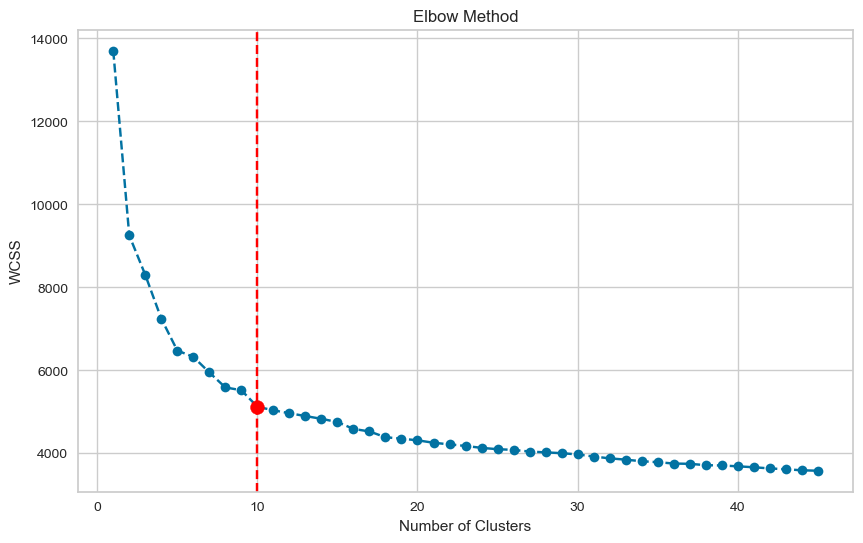

Optimal number of clusters (Elbow Method): 10


In [28]:
# Determine Optimal Clusters (Elbow & Silhouette Method)
wcss = []
rt = rt+1
for i in range(1, rt):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, rt), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Use KneeLocator to find the elbow point
knee = KneeLocator(range(1, rt), wcss, curve='convex', direction='decreasing')
optimal_clusters_elbow = knee.elbow

# Highlight the elbow point on the plot
plt.axvline(x=optimal_clusters_elbow, color='red', linestyle='--', label=f'Optimal k = {optimal_clusters_elbow}')
plt.scatter(optimal_clusters_elbow, wcss[optimal_clusters_elbow - 1], color='red', s=100, zorder=5)  # Highlight the point

plt.show()

print(f"Optimal number of clusters (Elbow Method): {optimal_clusters_elbow}")

### [5.3. Silhouette Score](#Table-of-Contents)

**Silhouette Score** is a metric used to evaluate the quality of clustering by measuring how well each data point fits within its assigned cluster. The Silhouette Score (S) is calculated as:
$$
S = \frac{b - a}{\max(a, b)}
$$

where:
- $𝑎$ is the **average intra-cluster distance** (how close a point is to other points in the same cluster).
- $𝑏$ is the **average nearest-cluster distance** (how far a point is from points in the closest neighboring cluster).

A **higher silhouette score** indicates well-separated clusters, whereas a lower score suggests potential overlap between clusters.

### [5.4. Silhouette Plots](#Table-of-Contents)

The **Silhouette Plot** is used to evaluate the quality of clustering by visualizing how well each data point fits within its assigned cluster. It provides insights into:

- **Cluster separation**: Measures how distinct clusters are from one another.
- **Intra-cluster cohesion**: Shows how tightly grouped points are within the same cluster.
- **Misclassified points**: Identifies points that may belong to a different cluster.

Each cluster’s silhouette width represents how similar its points are compared to neighboring clusters. A **higher silhouette score** indicates **better-defined clusters**, while a **low or negative score** suggests **overlapping or poorly separated clusters**.

Silhouette plots help assess whether the chosen number of clusters (K) is appropriate, guiding refinements in the clustering process. 

#### [5.4.1. K=2](#Table-of-Contents)

The highest silhouette score achieved (0.28) but still below 0.5.
The two clusters are relatively well-defined, but some overlap exists near the red line.

#### [5.4.2. K=3 to K=5](#Table-of-Contents)

The silhouette score gradually declines.
Clusters begin to split, leading to lower separation quality.
Some clusters show wide variations, indicating inconsistent segmentation.

#### [5.4.3. K=6 to K=10](#Table-of-Contents)

The silhouette coefficient continues dropping.
Irregular cluster widths suggest some clusters are well-defined while others are forced.
Some segments contain negative silhouette values, indicating that certain points may belong to a different cluster.

#### [5.4.4. K=11](#Table-of-Contents)

The silhouette coefficient further declines.
Clusters become unstable and poorly separated.
No improvement in segmentation quality, reinforcing that increasing K is not beneficial.

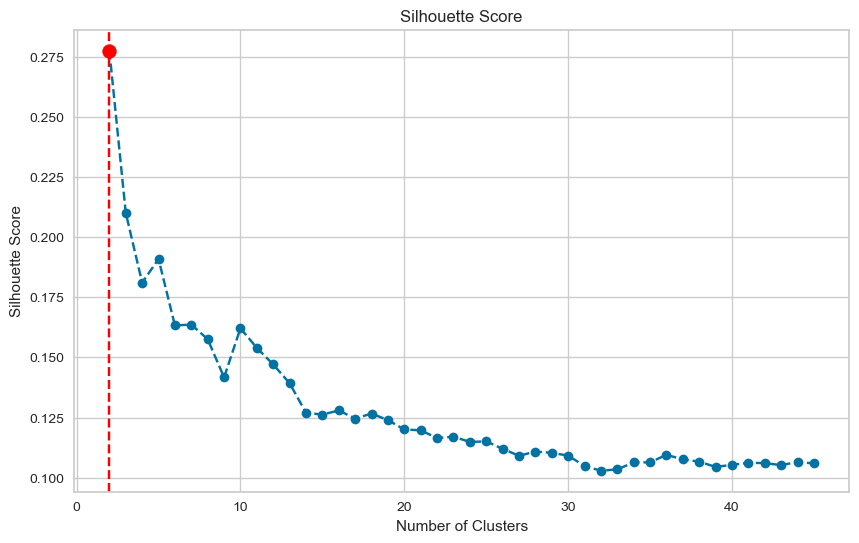

Maximum Silhouette Score: 0.28
Silhouette Score is less than 0.5. Omitting Silhouette Score.


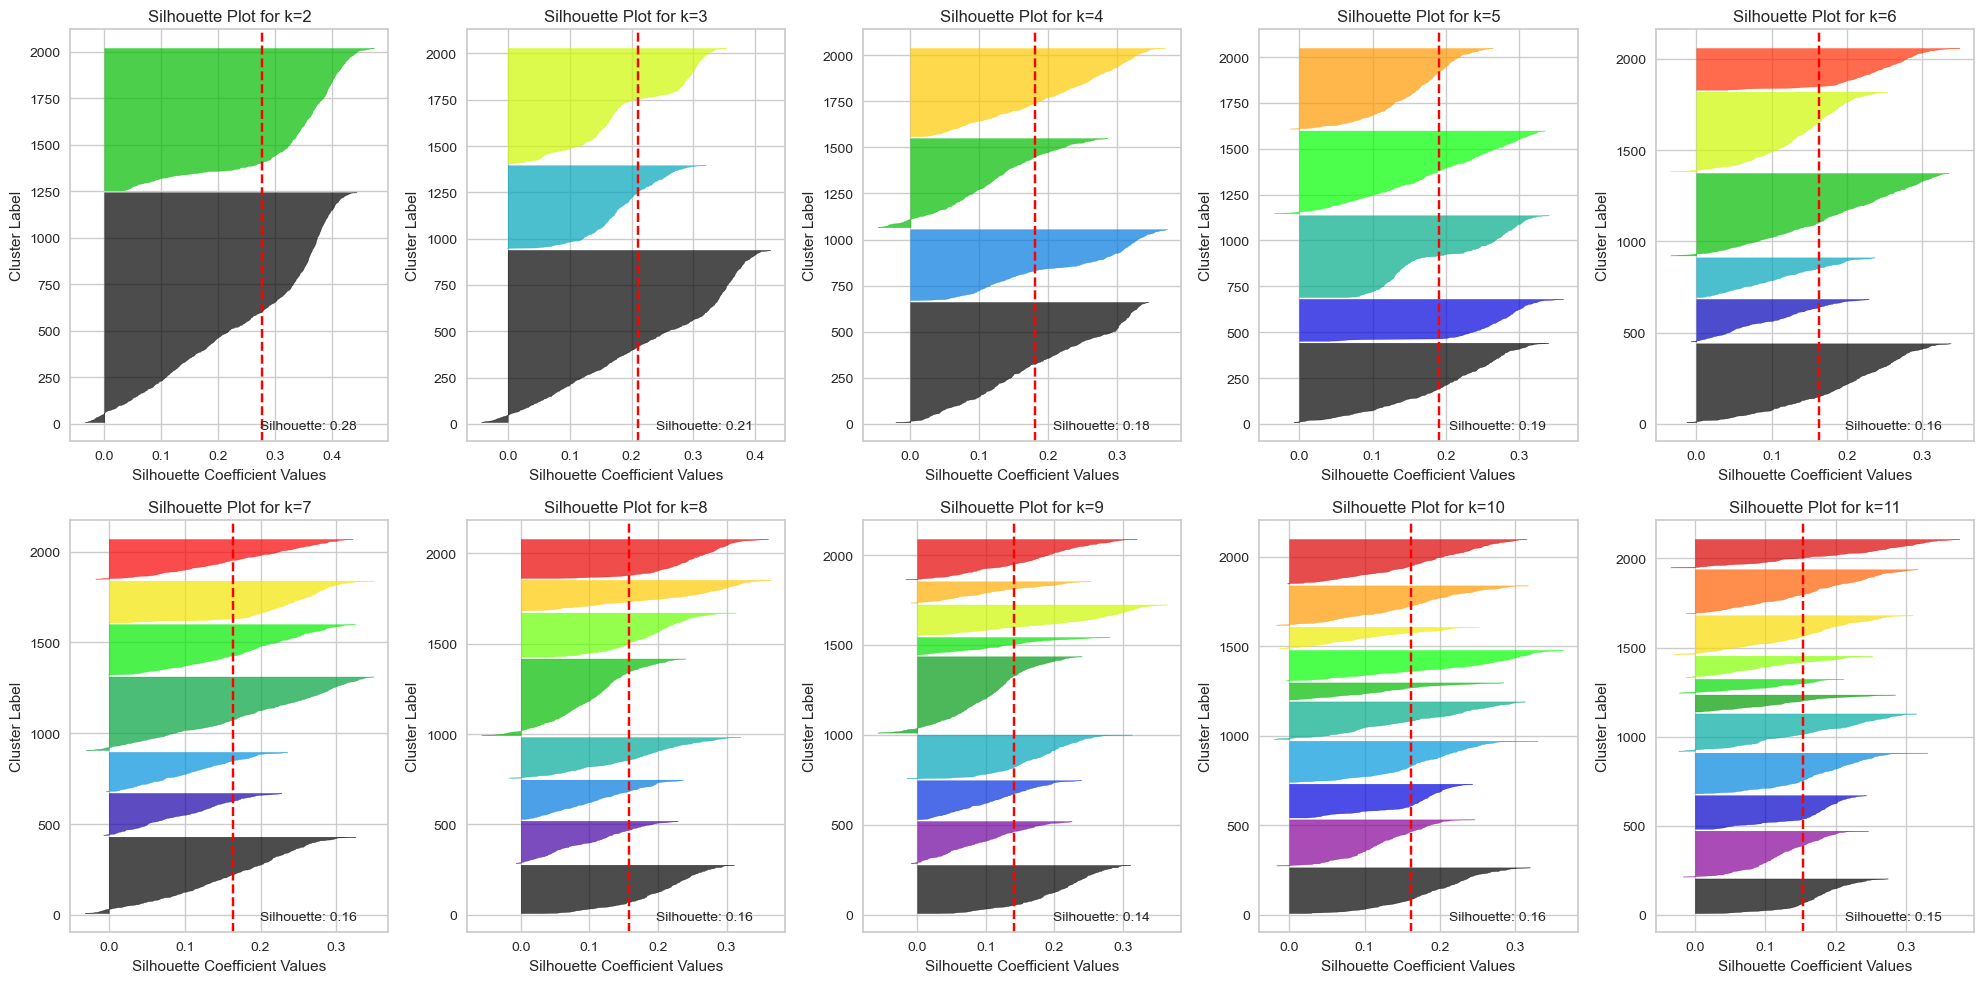

In [41]:
# Silhouette Score
silhouette_scores = []
for i in range(2, rt):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_df)
    score = silhouette_score(transformed_df, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette Polts
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
max_silhouette_score = max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range(2, rt), silhouette_scores, marker='o', linestyle='--')
plt.axvline(x=optimal_clusters_silhouette, color='red', linestyle='--', label=f'Best k = {optimal_clusters_silhouette}')
plt.scatter(optimal_clusters_silhouette, max_silhouette_score, color='red', s=100, zorder=5)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
def plot_silhouette(n_clusters, X):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, k in enumerate(range(2, 12)):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        y_lower = 10
        for j in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[np.where(cluster_labels == j)]
            ith_cluster_silhouette_values.sort()
            size_cluster_j = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            color = cm.nipy_spectral(float(j) / k)
            axes[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            y_lower = y_upper + 10  
        
        axes[i].set_title(f'Silhouette Plot for k={k}')
        axes[i].set_xlabel('Silhouette Coefficient Values')
        axes[i].set_ylabel('Cluster Label')
        axes[i].axvline(x=silhouette_avg, color='red', linestyle='--')
        axes[i].text(0.9, 0.02, f'Silhouette: {silhouette_avg:.2f}', transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

print(f"Maximum Silhouette Score: {max_silhouette_score:.2f}")

if max_silhouette_score < 0.5:
    print("Silhouette Score is less than 0.5. Omitting Silhouette Score.")
    optimal_k = optimal_clusters_elbow
else:
    print(f"Optimal number of clusters (Silhouette Score): {optimal_clusters_silhouette}")
    optimal_k = max(optimal_clusters_elbow, optimal_clusters_silhouette)

plot_silhouette(optimal_k, transformed_df)

### [5.5. Optimal K](#Table-of-Contents)

The highest silhouette score (0.28) at K=2 indicates weak cluster separation, suggesting that the clusters are not well-defined. As K increased, the Silhouette Score declined further, confirming moderate overlaps between clusters. This trend suggests that the data may not naturally form well-separated groups under K-Means.

Since the Silhouette Score was **inconclusive**, the final number of clusters was determined using the **Elbow Method**, which identified **K = 10** as the optimal choice.

In [44]:
print(f"Final Optimal Number of Clusters: {optimal_k}")

Final Optimal Number of Clusters: 10


## [6. Cluster Analysis](#Table-of-Contents)

### [6.1. 3D Visualization of Customer Segmentation Using PCA](#Table-of-Contents)

Using **K-Means clustering with K=10**, customers were segmented into distinct groups based on their demographic and behavioral attributes. To simplify the high-dimensional data, **Principal Component Analysis (PCA)** reduced the features to **three components (PCA1, PCA2, PCA3)**, retaining most of the variance. A **3D scatter plot** was created to visualize the clusters, where each point represents a customer and is color-coded by cluster. The interactive plot highlights cluster separations and overlaps, providing insights into customer behavior patterns. This visualization aids in **identifying distinct customer segments, supporting targeted marketing strategies and personalized engagement efforts**.

In [48]:
# Apply KMeans Clustering with Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_transformed)+1

# PCA for Visualization
# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_transformed)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2] 

# Create a 3D scatter plot with Plotly
fig = go.Figure()

# Define colors for clusters
colors = px.colors.qualitative.Plotly  # Use Plotly's default qualitative colors

# Add data points for each cluster separately
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PCA1'],  # PCA Component 1
        y=cluster_data['PCA2'],  # PCA Component 2
        z=cluster_data['PCA3'],  # PCA Component 3
        mode='markers',
        marker=dict(
            size=5,  # Marker size
            opacity=0.7  # Transparency
        ),
        name=f'Cluster {cluster}',  # Legend label
        hovertext=cluster_data.index,  # Tooltip: Show customer ID or index
        hovertemplate='Customer ID: %{hovertext}<br>PCA1: %{x}<br>PCA2: %{y}<br>PCA3: %{z}'  # Custom tooltip
    ))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),  # Centered title
    scene=dict(
        xaxis=dict(title='PCA Component 1', backgroundcolor="#fcf0dc", gridcolor='white'),
        yaxis=dict(title='PCA Component 2', backgroundcolor="#fcf0dc", gridcolor='white'),
        zaxis=dict(title='PCA Component 3', backgroundcolor="#fcf0dc", gridcolor='white'),
    ),
    width=900,  # Plot width
    height=800  # Plot height
)

# Show the plot
fig.show()

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_transformed)
# df['PCA1'] = X_pca[:, 0]
# df['PCA2'] = X_pca[:, 1]

# # PCA Visualization
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='tab10', alpha=0.7)
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('Customer Segmentation - PCA Visualization')
# plt.legend(title='Cluster')
# plt.show()

# # Cluster Distribution with Data Labels
# plt.figure(figsize=(8, 8))
# ax = sns.countplot(x=df['Cluster'], palette='tab10', hue=df['Cluster'], legend=False)  # Add hue to avoid warning
# plt.xlabel('Cluster')
# plt.ylabel('Number of Customers')
# plt.title('Cluster Distribution')

# # Add data labels
# for p in ax.patches:
#     ax.annotate(
#         f'{int(p.get_height())}',  # Text to display (count of customers)
#         (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
#         ha='center',  # Horizontal alignment
#         va='center',  # Vertical alignment
#         xytext=(0, 10),  # Offset from the bar
#         textcoords='offset points'
#     )

# plt.show()

### [6.2. Cluster Distributiom](#Table-of-Contents)

The bar chart illustrates the distribution of customers across the **10 clusters** identified by the K-Means algorithm. Each bar represents the number of customers in a specific cluster. Cluster sizes range from **118 customers in Cluster 9 (smallest)** to **258 customers in Cluster 2 (largest)**, highlighting variations in cluster density. This distribution provides insights into the relative sizes of customer groups, indicating that some clusters may represent niche customer segments while others encompass broader groups. These insights are crucial for tailoring targeted marketing strategies to each segment.

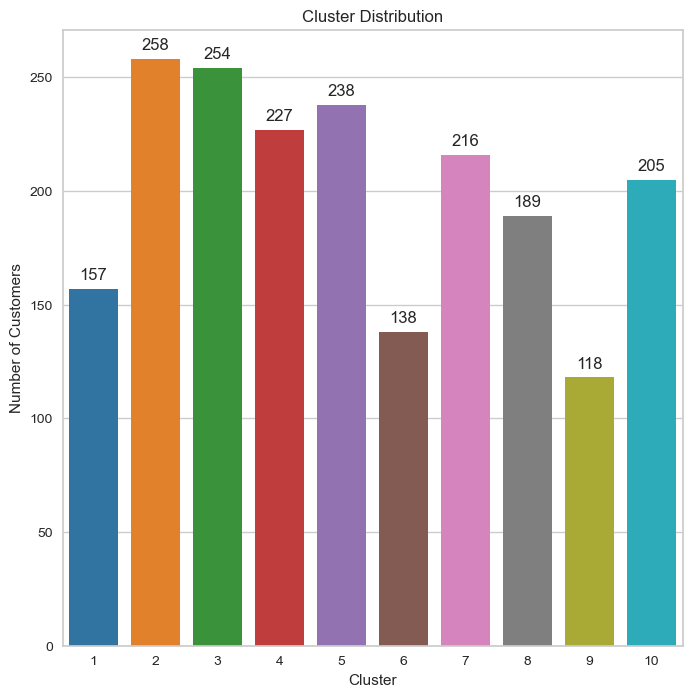

In [51]:
# Cluster Distribution with Data Labels (2D)
plt.figure(figsize=(8, 8))
ax = sns.countplot(x=df['Cluster'], palette='tab10', hue=df['Cluster'], legend=False)  # Add hue to avoid warning
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')

# Add data labels
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text to display (count of customers)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 10),  # Offset from the bar
        textcoords='offset points'
    )

plt.show()


### [6.3. Customer Behaviour Analysis](#Table-of-Contents)

A comprehensive breakdown of customer behavior reveals key insights into demographics, purchasing patterns, subscription preferences, and shopping channels. Visual representations, including tables, radar charts (for numerical features), and bar graphs (for categorical features), illustrate how different customer segments interact with products and services. These insights provide a data-driven foundation for crafting targeted marketing strategies and enhancing customer engagement.

#### [6.3.1. Cluster 1: Premium Online Shoppers - Clothing Enthusiasts](#Table-of-Contents)

This cluster is primarily composed of young female shoppers with an average age of 22 years, indicating a trendy, fashion-conscious segment. These customers belong to a high-income group, with an average annual income of $113,924. They demonstrate a high spending score (84.98), signifying frequent and high-value purchases, along with a very frequent purchase rate (21.61 transactions on average). Every customer in this cluster subscribes to a Premium plan, reflecting a preference for exclusive deals, personalized services, and priority benefits. Their dominant shopping channel is Online, with 104 out of 157 customers making digital purchases. Clothing is their top product category, reinforcing their inclination toward fashion-related products.

#### [6.3.2. Cluster 2: In-Store Home & Kitchen Shoppers - Budget-Conscious](#Table-of-Contents)

Comprised mainly of older female shoppers (average age of 58 years), this segment prefers a more traditional shopping experience. Customers in this cluster have a mid-to-upper income level (average annual income of $98,280), but they exhibit conservative spending behavior (spending score of 29.26), indicating a more practical and necessity-driven approach to shopping. Their purchase frequency is moderate (7.65 transactions on average), showing that they prioritize planned purchases rather than impulsive buying. The majority subscribe to the Standard plan, reflecting their inclination for cost-effective deals over premium benefits. Their preferred shopping channel is In-Store (181 customers), reinforcing their preference for physical product evaluation before making a purchase. The most purchased category is Home & Kitchen products, highlighting an interest in household essentials.

#### [6.3.3. Cluster 3: Young Online Shoppers - Clothing & Beauty Lovers](#Table-of-Contents)

This segment consists mainly of young male shoppers (average age of 22 years) who are highly engaged in online shopping. With an annual income of $99,646, they belong to a financially comfortable segment. Their spending score is high (84.14), showing a strong enthusiasm for fashion, beauty, and electronics. They also shop frequently (13.35 transactions on average), indicating active engagement with digital retail platforms. The majority are Standard subscribers, suggesting that they seek affordability, discounts, and seasonal promotions. Their primary shopping channel is Online (182 out of 254 customers). The top purchased categories include Clothing (68 customers), Beauty (50 customers), and Electronics (46 customers), emphasizing their diverse but fashion-forward shopping preferences.

#### [6.3.4. Cluster 4: In-Store Electronics & Home & Kitchen Buyers - Basic Subscribers](#Table-of-Contents)

Customers in this cluster are mostly middle-aged females (average age 37.9 years) with a lower income bracket (average annual income of $49,180), indicating a budget-conscious approach to shopping. Their spending score is moderate (60.04), suggesting that while they are selective in their purchases, they still make significant transactions when needed. They are occasional shoppers (8.34 transactions on average), showing a less frequent but intentional shopping pattern. A majority of these customers subscribe to Basic plans (176 out of 227 customers), favoring affordability over premium perks. Their shopping preferences are evenly split between In-Store (92 customers) and Online (88 customers), with some also using Mobile Apps (47 customers). The most purchased products include Electronics (59 customers), Clothing (37 customers), and Home & Kitchen (34 customers), reinforcing a practical and necessity-driven spending pattern.

#### [6.3.5. Cluster 5: In-Store Clothing & Home Buyers - Standard Subscribers](#Table-of-Contents)

This cluster represents a balanced mix of male and female shoppers (average age 38 years), primarily from a middle-class income group (average annual income of $96,615). Their spending behavior is moderate (spending score of 60.03), indicating practical shopping choices. They shop regularly (14.36 transactions on average), showing a consistent engagement with retail channels. The majority subscribe to the Standard plan (216 out of 238 customers), emphasizing a preference for cost-effective deals and promotional offers. Their shopping channels are diverse, with In-Store (97 customers), Online (91 customers), and Mobile App (50 customers) showing significant representation. The most popular product categories in this cluster include Clothing (55 customers), Home & Kitchen (48 customers), and Electronics (47 customers), suggesting that they prioritize household essentials and fashion-related products.

#### [6.3.6. Cluster 6: Tech-Savvy Budget Shoppers](#Table-of-Contents)

This segment consists of an almost equal split of male (68) and female (70) shoppers, all of whom are Basic plan subscribers, reinforcing their budget-conscious shopping behavior. They exhibit a strong preference for Online shopping (112 customers), with fewer relying on Mobile Apps (16) and In-Store (10). Their most popular product categories include Electronics (28 customers), Clothing (26 customers), Beauty (22 customers), and Home & Kitchen (22 customers). These shoppers are likely drawn to flash sales, discount offers, and seasonal promotions. Their purchasing habits suggest they are price-sensitive, technology-driven, and responsive to digital marketing efforts.

#### [6.3.7. Cluster 7: Home & Kitchen Enthusiasts](#Table-of-Contents)

This cluster contains a near-equal mix of male (113) and female (103) shoppers, predominantly Basic plan subscribers (153 customers), followed by Standard (39) and Premium (24). They overwhelmingly favor In-Store shopping (157 customers), with some Online (45) and Mobile App (14) purchases. Their top purchases include Home & Kitchen products (78 customers), followed by Books (38), Automotive (27), and Electronics (21). Customers in this segment prefer in-person shopping experiences, as they likely want to evaluate products firsthand before making a purchase.

#### [6.3.8. Cluster 8: Premium Household Buyers](#Table-of-Contents)

This cluster consists of almost equal male (93) and female (96) representation, with a strong inclination toward Premium subscriptions (166 customers), and a smaller percentage on Basic plans (23). The majority shop In-Store (135 customers), with some Online (39) and Mobile App (15) users. Their top product categories include Home & Kitchen (56 customers), Books (31), Clothing (27), and Electronics (20). This segment exhibits a high-spending behavior, prioritizing premium household and lifestyle products, and is likely to spend more on durable goods and luxury items.

#### [6.3.9. Cluster 9: Digital Fashion Shoppers](#Table-of-Contents)

This group consists of slightly more males (65) than females (53) and a diverse mix of subscription types (Standard: 49, Basic: 45, Premium: 24). They primarily shop Online (81 customers), followed by Mobile App (23) and In-Store (14). The top product categories include Clothing (33 customers), Beauty (25), and Electronics (22). Their behavior suggests they are style-conscious shoppers who rely on digital platforms for trends and promotions. This cluster is highly influenced by social media, influencer marketing, and online discounts.

#### [6.3.10. Cluster 10: Premium Electronics Buyers](#Table-of-Contents)

This cluster has a nearly equal gender split (106 males, 99 females), with a strong preference for Premium subscriptions (153 customers), followed by Basic (52). They exhibit a balanced shopping preference across Online (83 customers), In-Store (70), and Mobile App (52). Their most purchased products include Electronics (44 customers), Home & Kitchen (38), and Clothing (38). This segment represents high-income consumers who carefully research and invest in premium electronics and household appliances. They value detailed product reviews, expert recommendations, and exclusive deals on high-end gadgets.

In [74]:
# Analyze Customer Behavior
cluster_analysis_numeric = df.groupby('Cluster')[numeric_features].mean()
cluster_analysis_categorical = df.groupby('Cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])
# cluster_analysis_numeric
# Combine numerical and categorical analysis
cluster_analysis = pd.concat([cluster_analysis_numeric, cluster_analysis_categorical], axis=1)
cluster_analysis

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Customer_Tenure,Gender,Subscription_Type,Channel,Product_Category
Cluster,,,,,,,,,
1,22.000000,113924.821656,84.980892,21.611465,2.407643,Female,Premium,Online,Clothing
2,58.000000,98280.069767,29.267442,7.647287,7.003876,Female,Standard,In-Store,Home & Kitchen
3,22.062992,99645.724409,84.141732,13.346457,2.397638,Male,Standard,Online,Clothing
4,37.929515,49180.000000,60.048458,8.343612,4.559471,Female,Basic,In-Store,Electronics
5,38.000000,96615.277311,60.033613,14.365546,4.436975,Male,Standard,In-Store,Clothing
6,22.579710,55227.673913,83.971014,4.775362,2.615942,Female,Basic,Online,Electronics
7,58.000000,49180.000000,29.222222,7.314815,7.101852,Male,Basic,In-Store,Home & Kitchen
8,58.000000,113961.105820,29.931217,7.259259,6.962963,Female,Premium,In-Store,Home & Kitchen
9,23.491525,49180.000000,83.152542,15.567797,2.542373,Male,Standard,Online,Clothing


In [75]:
# Normalize the numeric features for the radar chart
scaler = MinMaxScaler()
cluster_analysis_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_analysis_numeric),
    columns=cluster_analysis_numeric.columns,
    index=cluster_analysis_numeric.index
)

# Create a 2x5 grid of subplots
fig = make_subplots(
    rows=5, cols=2,  # 5 rows x 2 columns
    specs=[[{'type': 'polar'}] * 2] * 5,  # Each subplot is a radar chart
    subplot_titles=[f'Cluster {i}' for i in cluster_analysis_normalized.index]  # Titles for each subplot
)

# Add a radar chart for each cluster
for i, cluster in enumerate(cluster_analysis_normalized.index):
    row = (i // 2) + 1  # Calculate row position (1 to 5)
    col = (i % 2) + 1   # Calculate column position (1 or 2)
    
    fig.add_trace(
        go.Scatterpolar(
            r=cluster_analysis_normalized.loc[cluster].values,  # Values for each feature
            theta=numeric_features,  # Feature names
            fill='toself',  # Fill the area under the line
            name=f'Cluster {cluster}',  # Legend label
            line_color=px.colors.qualitative.Plotly[i],
            fillcolor=px.colors.qualitative.Plotly[i],
            hovertemplate='%{theta}: %{r:.2f}'  # Tooltip with feature name and value
        ),
        row=row, col=col  # Position in the grid
    )

# Update layout for the radar charts
fig.update_layout(
    title='Radar Charts of Customer Behavior by Cluster',
    showlegend=False,  # Hide legend (optional)
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Normalized range
        )
    ),
    width=1000,  # Adjust width
    height=2500  # Adjust height
)

# Show the grid of radar charts
fig.show()

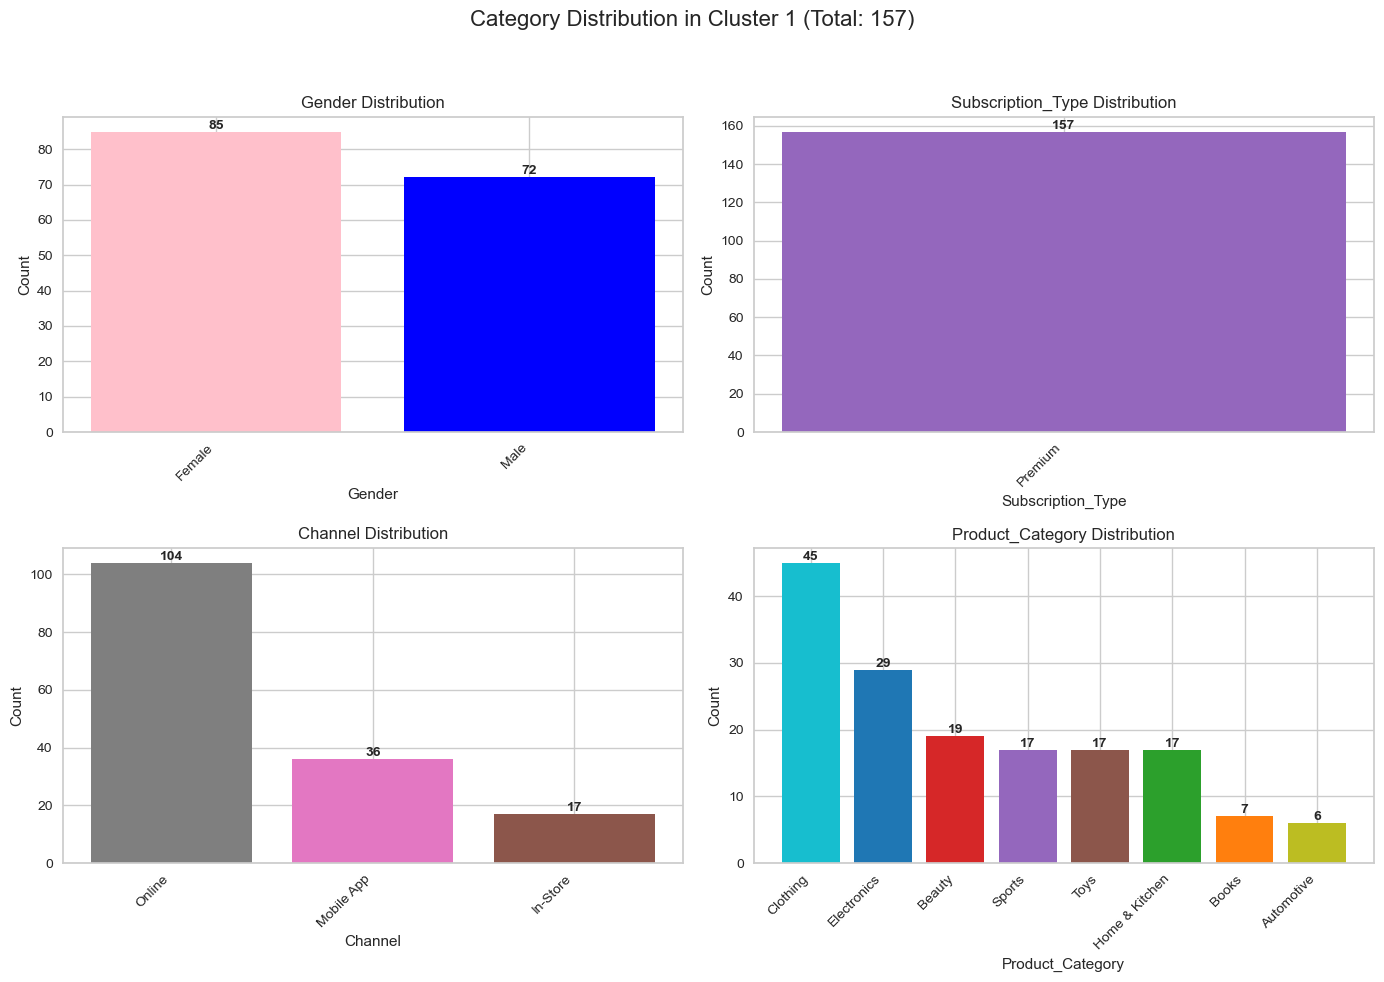

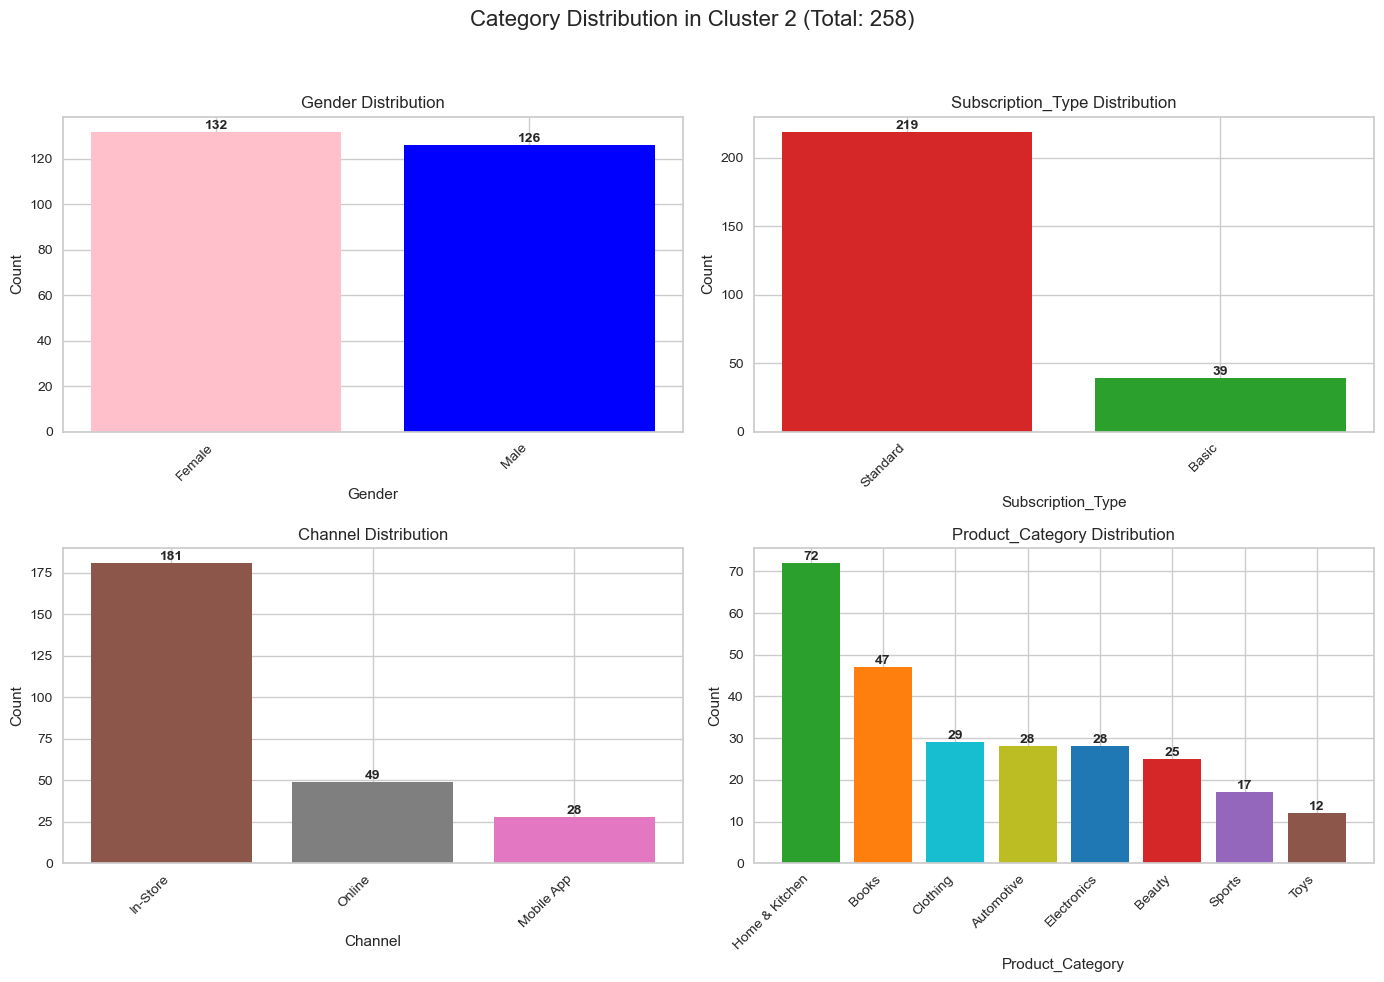

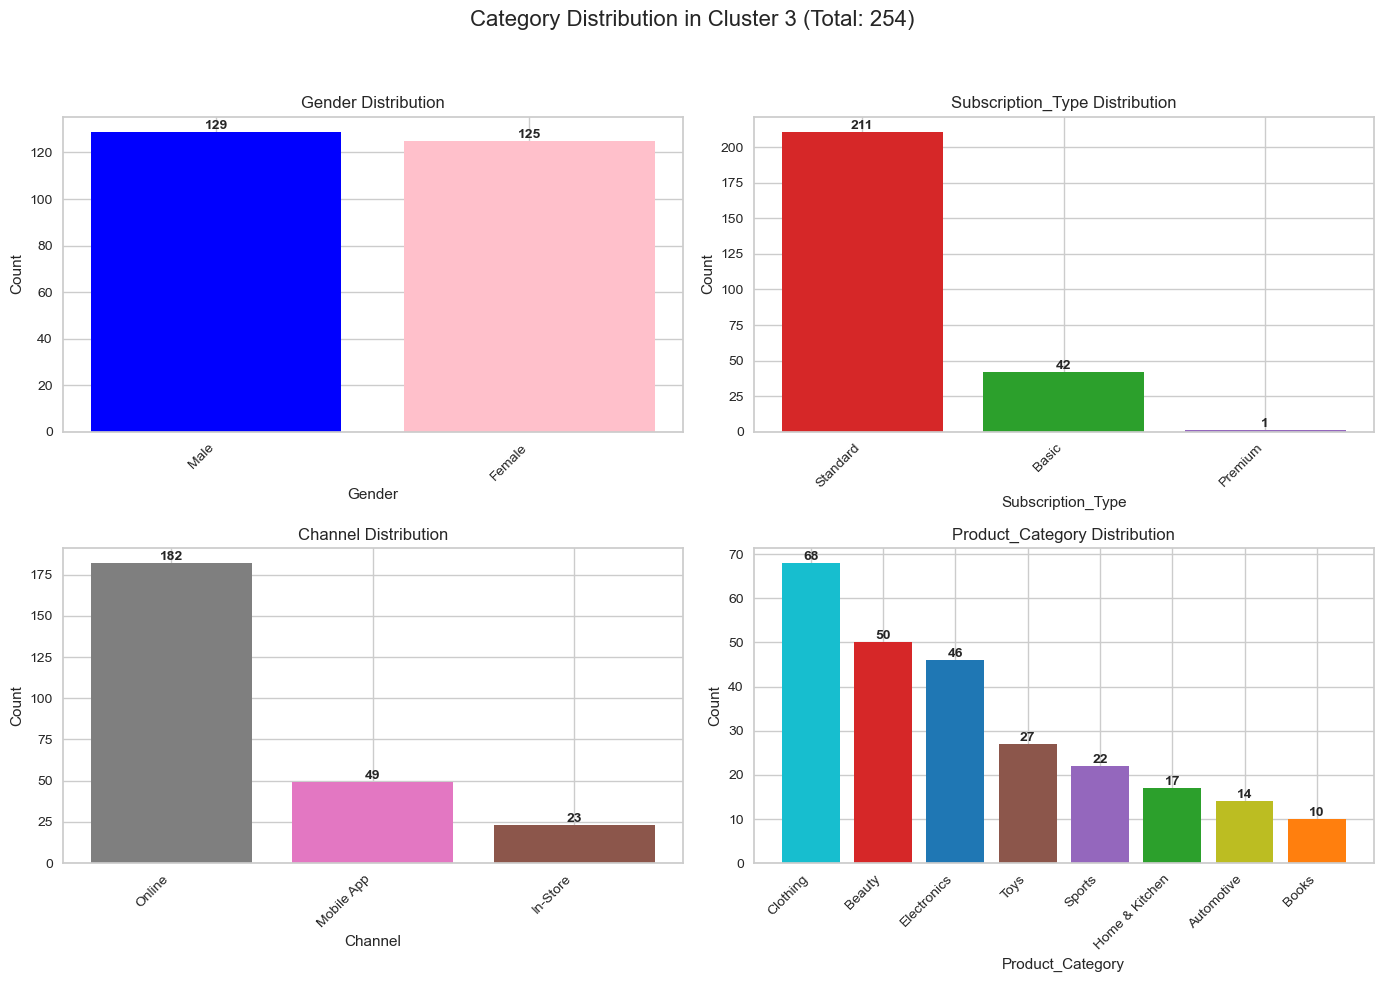

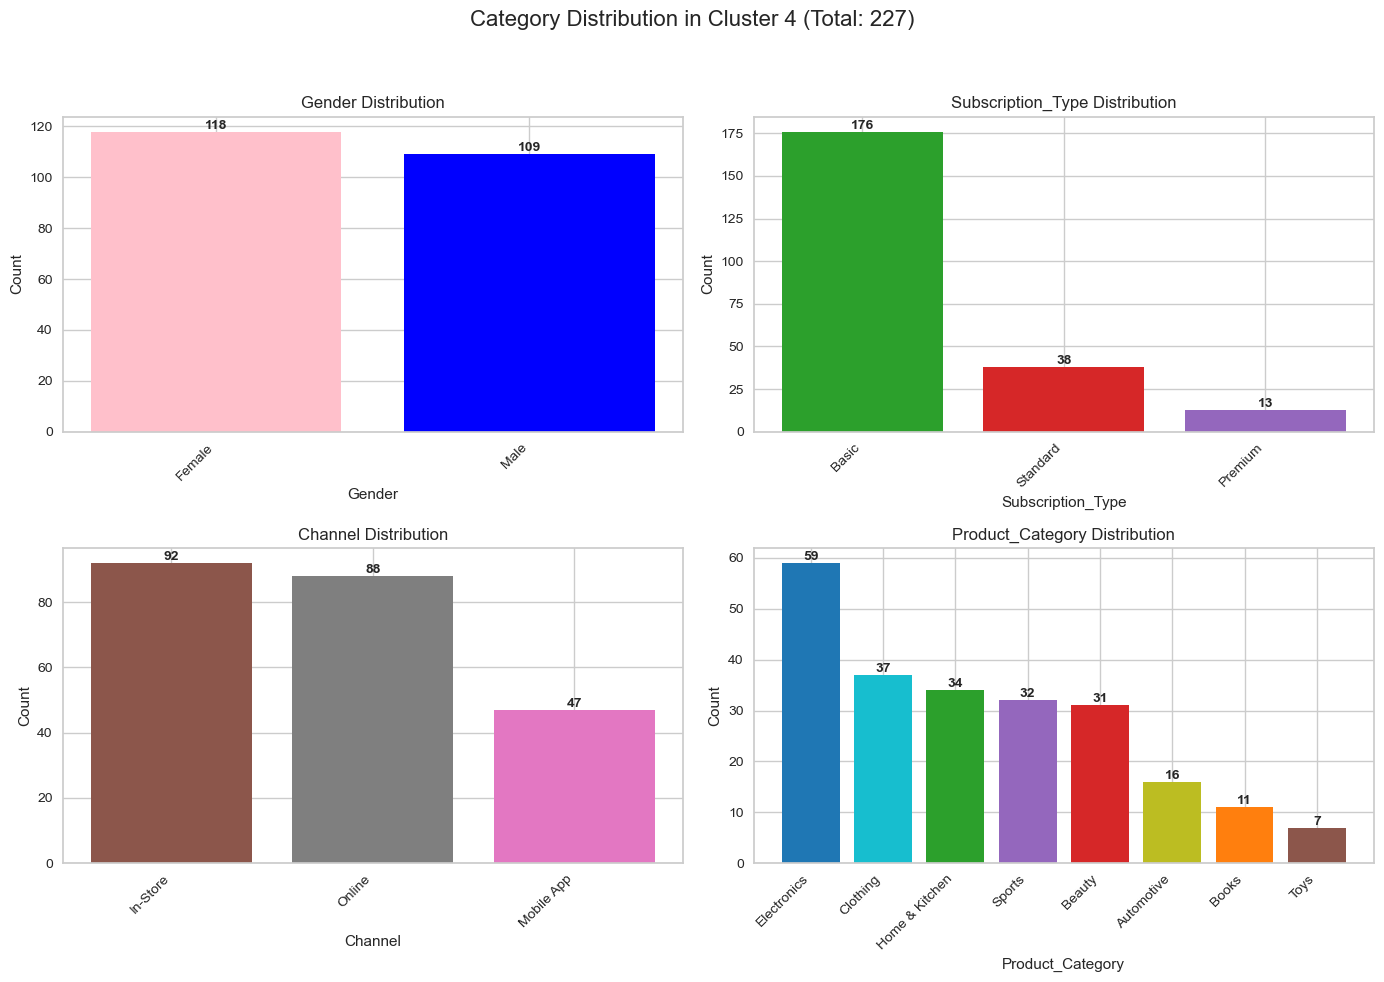

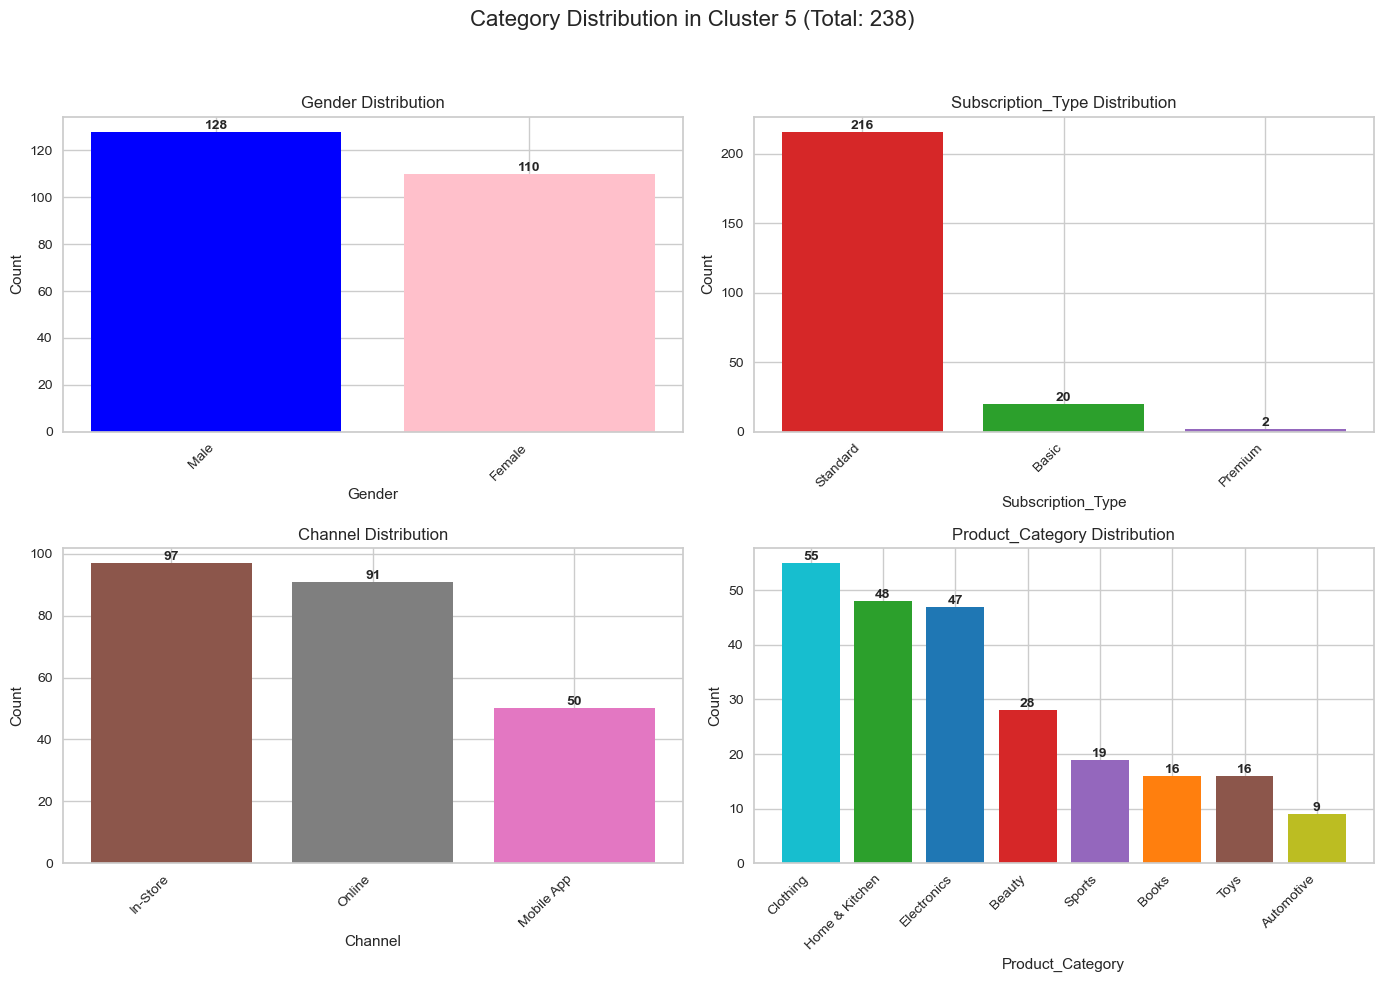

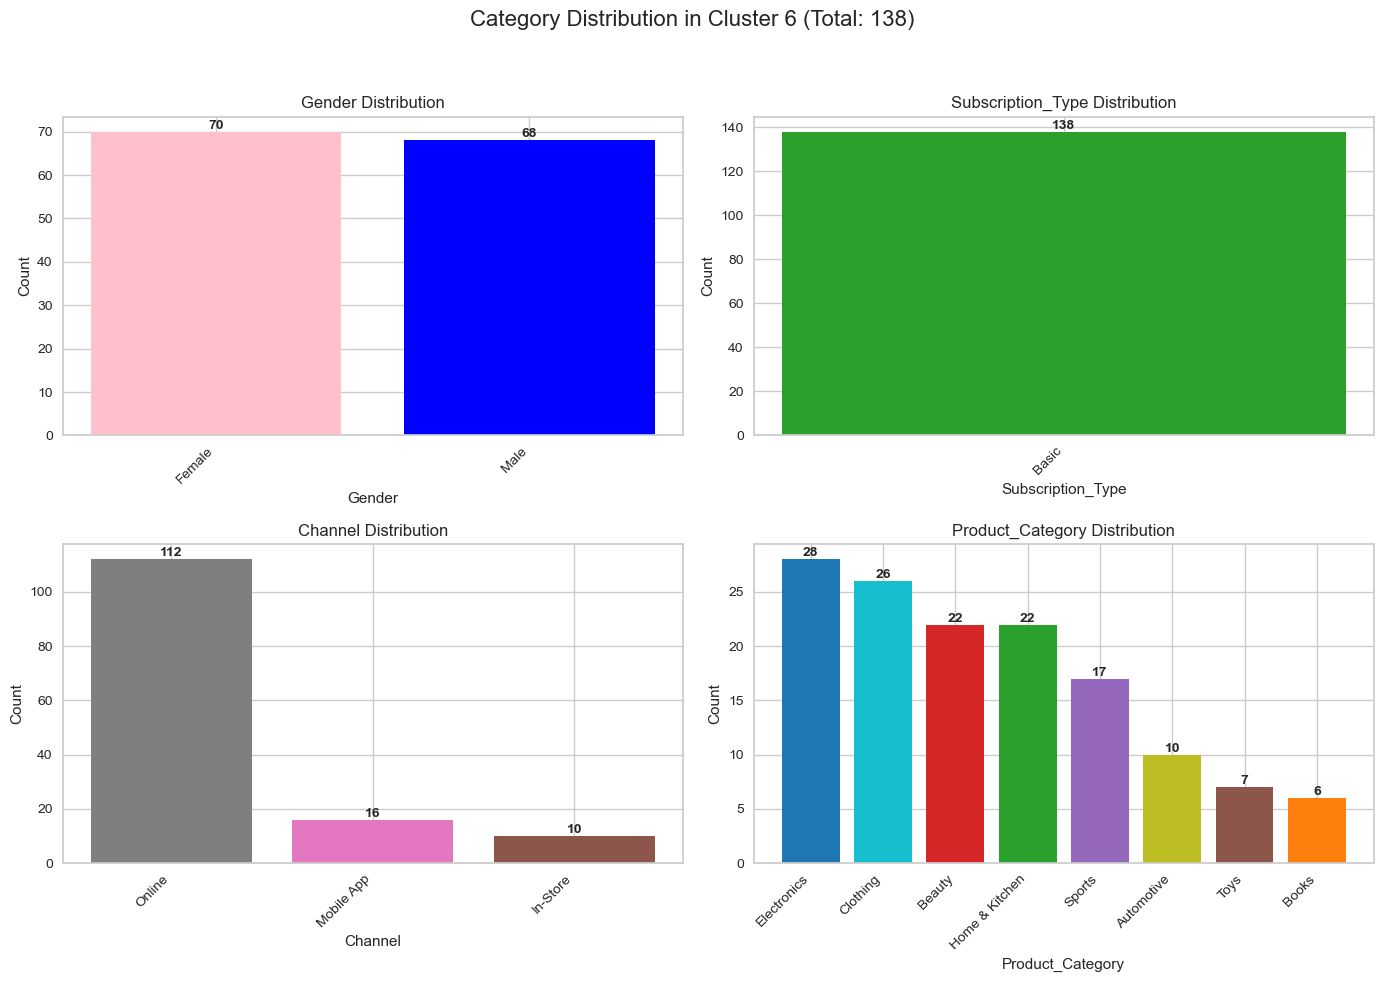

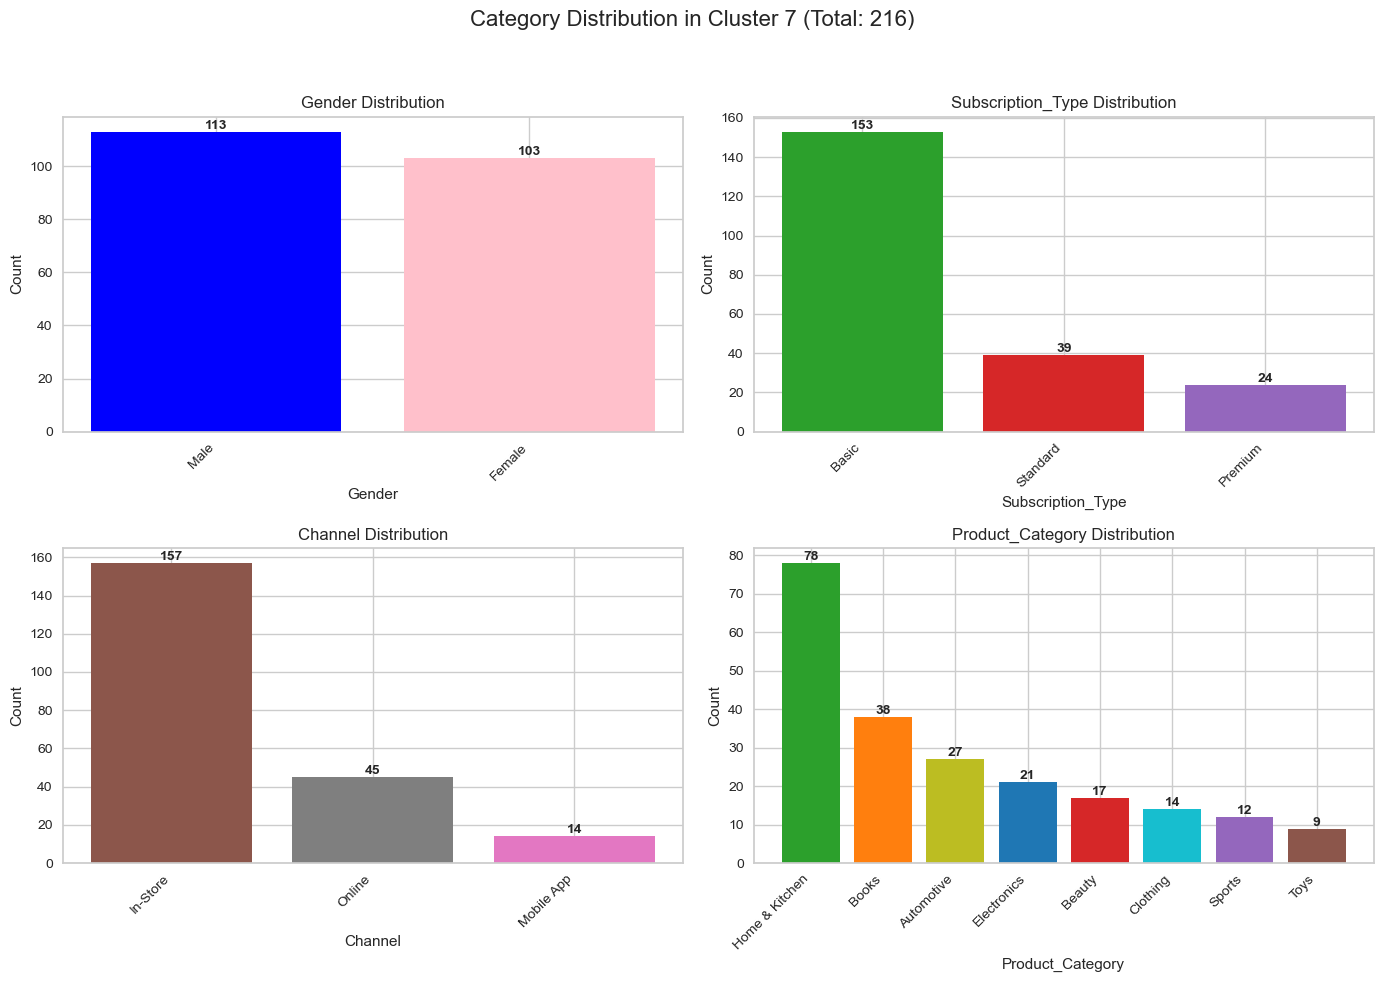

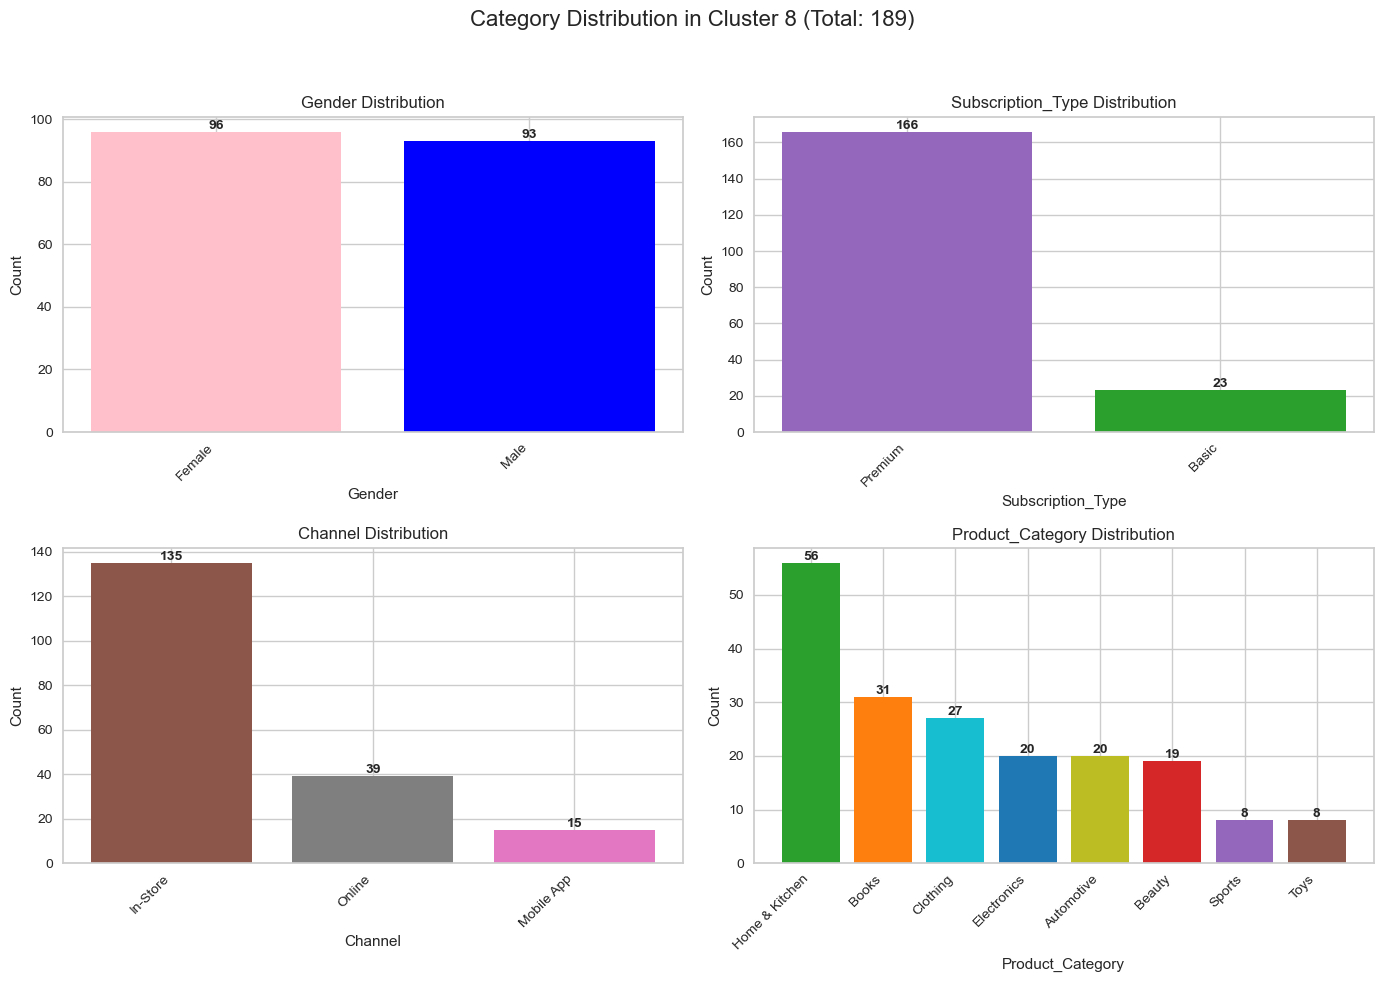

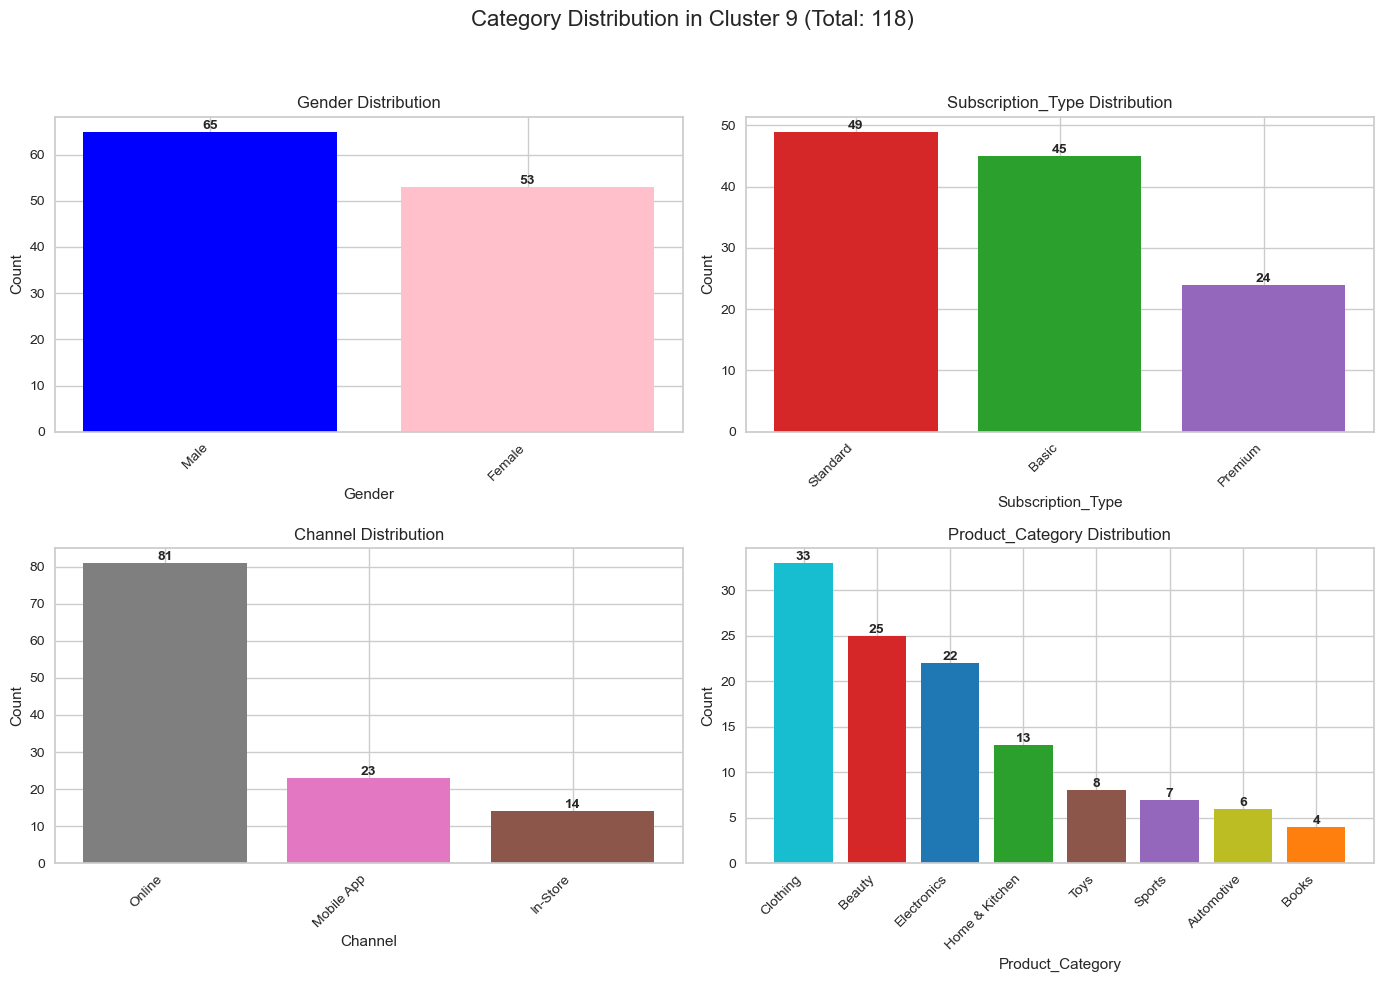

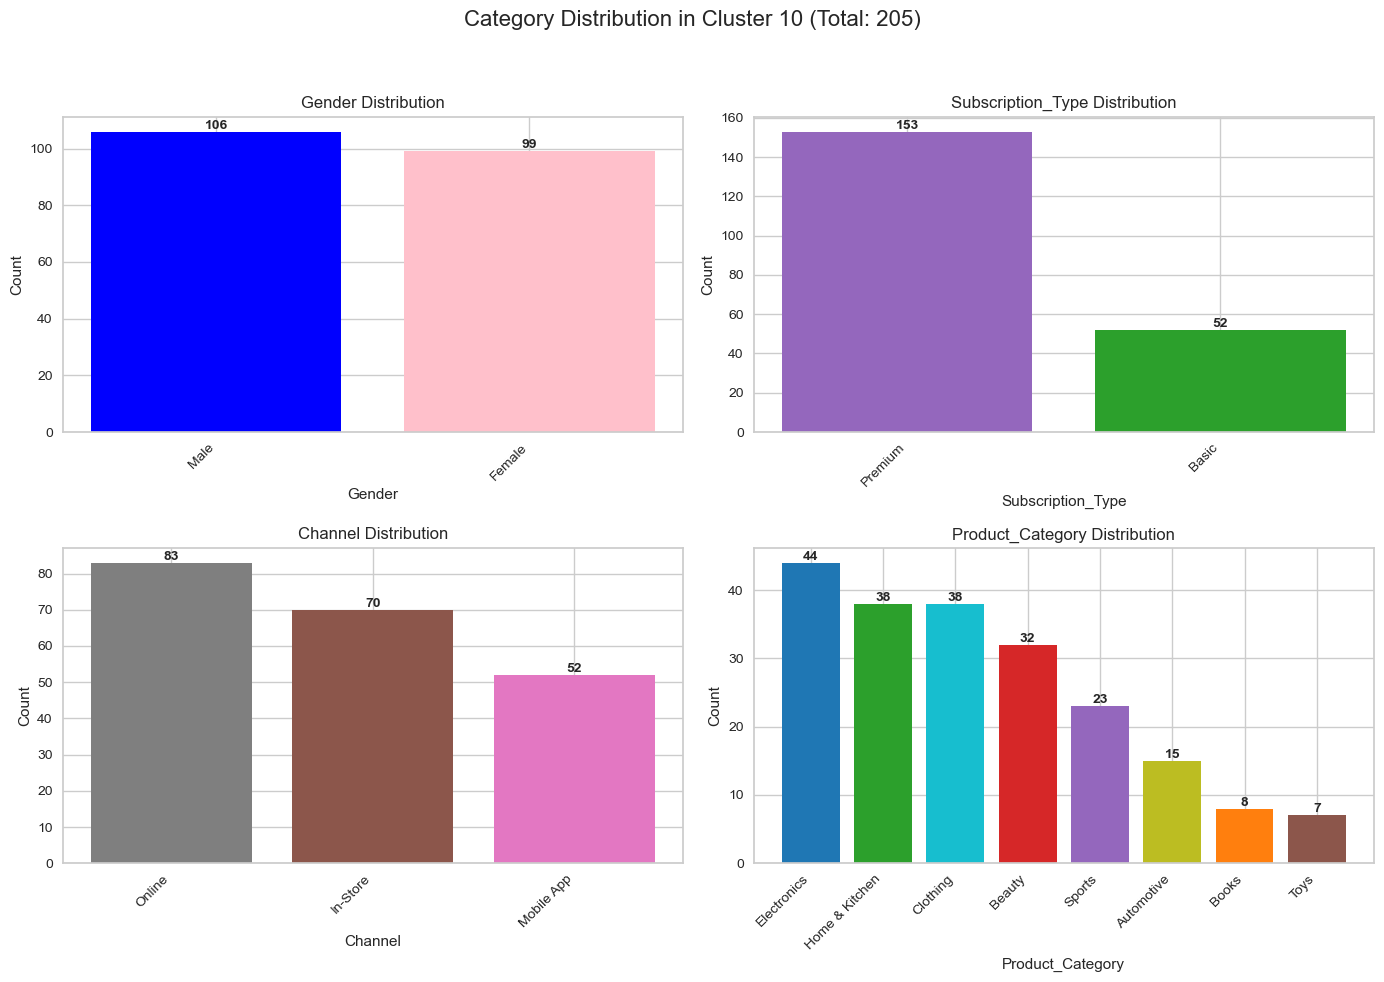

In [76]:
# Category Distribution per Cluster Visualization
clusters_sorted = sorted(df['Cluster'].unique())
for cluster in clusters_sorted:
    total_count = df[df['Cluster'] == cluster].shape[0]
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Category Distribution in Cluster {cluster} (Total: {total_count})', fontsize=16)
    
    for ax, category in zip(axes.flatten(), categorical_features):
        category_counts = df[df['Cluster'] == cluster][category].value_counts()
        colors = sns.color_palette('tab10', len(category_counts))
        unique_categories = df[categorical_features].melt()['value'].unique()
        color_map = {val: 'blue' if val == 'Male' else 'pink' if val == 'Female' else color for val, color in zip(unique_categories, sns.color_palette('tab10', len(unique_categories)))}
        colors = [color_map[val] for val in category_counts.index]
        
        bars = ax.bar(category_counts.index, category_counts.values, color=colors)
        ax.set_xlabel(category)
        ax.set_ylabel('Count')
        ax.set_title(f'{category} Distribution')
        ax.set_xticks(range(len(category_counts.index)))
        ax.set_xticklabels(category_counts.index, rotation=45, ha='right')
        
        # Add data labels
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# for category in categorical_features:
#     category_counts = df.groupby(['Cluster', category])['Product_Category'].count().unstack()
#     ax = category_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
#     plt.xlabel('Cluster')
#     plt.ylabel(f'Count of {category}')
#     plt.title(f'{category} Distribution Across Clusters')
#     plt.legend(title=category)
    
#     # Add data labels
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
    
#     plt.show()

## [7. Marketing Strategies & Recommendation](#Table-of-Contents)

Understanding customer preferences and shopping behaviors is crucial for designing effective marketing strategies. By segmenting customers based on their purchasing habits, brands can tailor their approaches to maximize engagement, drive conversions, and foster long-term loyalty. The following strategies and recommendations align with the distinct characteristics of each customer cluster.

Clusters 1 & 3 are young online shoppers focused on fashion and beauty, making them ideal candidates for personalized marketing strategies such as AI-driven product recommendations, influencer collaborations, and exclusive online discounts. Social media engagement and targeted advertisements can drive conversions within these segments.

Clusters 2 & 4 consist of budget-conscious in-store shoppers primarily purchasing home essentials and electronics. These consumers would benefit from bundle offers, in-store discounts, and loyalty programs designed to encourage repeat purchases. In-store demonstrations and seasonal promotions can help increase engagement and brand loyalty.

Cluster 5 exhibits a balanced in-store and online shopping behavior, making them ideal for omnichannel marketing strategies. A seamless transition between physical stores, e-commerce platforms, and mobile apps can enhance their shopping experience. Offering hybrid discounts, click-and-collect services, and personalized emails would be effective.

Clusters 6 & 9 are digital-savvy shoppers, with Cluster 6 focused on budget electronics and clothing, while Cluster 9 leans toward fashion and beauty. These segments are highly responsive to flash sales, discounts, and social media-driven campaigns. Leveraging AI-based recommendations and retargeting ads can boost conversions.

Clusters 7 & 8 are home & kitchen-focused buyers, with Cluster 7 favoring in-store shopping and Cluster 8 comprising premium household buyers. Offering home improvement workshops, VIP store events, and personalized recommendations for premium products can improve their engagement.

Clusters 10 & 8 consist of high-spending premium customers, particularly in electronics and home-related categories. These shoppers expect high-quality service, personalized deals, and early access to new product launches. Premium loyalty programs, concierge shopping experiences, and exclusive members-only promotions can significantly enhance retention.

By implementing these targeted marketing strategies, businesses can enhance customer engagement, foster brand loyalty, and drive long-term revenue growth. Each customer segment exhibits distinct preferences and behaviors, requiring tailored approaches to maximize satisfaction and purchasing frequency. By aligning marketing efforts with these insights, companies can create personalized shopping experiences, optimize promotional strategies, and improve customer retention.

The following table provides a concise summary of the marketing strategies and recommendations for each customer segment. It highlights key consumer characteristics, preferred shopping behaviors, and actionable steps to improve engagement, conversion rates, and overall business performance.

| Cluster  | Customer Segment        | Description | Marketing Strategies                                                                                           | Recommendations                                                                 |
|----------|-----------------------------------------|-------------|-------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **1**    | Premium Online Shoppers - Clothing Enthusiasts | Young, high-income shoppers who frequently buy fashion online. | - Exclusive online promotions  <br>- Loyalty programs <br>- Influencer campaigns <br>- AI-powered styling suggestions | - Flash sales & exclusive drops  <br>- Free shipping & priority delivery  <br>- Fashion subscription boxes  |
| **2**    | In-Store Home & Kitchen Shoppers - Budget-Conscious | Older, budget-conscious customers who prefer in-store purchases. | - In-store discount days  <br>- Coupon programs <br>- Email promotions <br>- Retail events & workshops | - "Buy More, Save More" program <br>- Free home delivery for bulk purchases <br>- Cashback incentives |
| **3**    | Young Online Shoppers - Clothing & Beauty Lovers | Young, trend-driven online shoppers focused on fashion and beauty. | - Social media advertising <br>- Gamified shopping experience <br>- Limited-edition drops <br>- Live shopping events | - Personalized beauty boxes <br>- Interactive online fitting room <br>- Subscription-based beauty bundles |
| **4**    | In-Store Electronics & Home & Kitchen Buyers - Basic Subscribers | Middle-aged, practical buyers looking for essential home & tech products. | - In-store demo areas <br>- Cross-promotional offers <br>- Targeted SMS/email campaigns <br>- Trade-in discounts | - Buy-now, pay-later financing <br>- Extended warranties <br>- Exchange program for old gadgets |
| **5**    | In-Store Clothing & Home Buyers - Standard Subscribers | Balanced in-store and online shoppers who buy clothing and home essentials. | - Seasonal discount events <br>- Multi-category bundling <br>- VIP shopping hours <br>- Referral rewards | - Frequent shopper loyalty program <br>- Personalized in-store shopping assistance <br>- QR-based shopping lists |
| **6**    | Tech-Savvy Budget Shoppers | Online-focused, price-sensitive consumers who prioritize tech & deals. | - Flash sales & limited-time offers <br>- Affiliate & cashback programs <br>- AI-powered shopping bots <br>- Subscription-based discounts | - Student discounts <br>- Price-match guarantees <br>- Budget bundle deals for electronics & clothing |
| **7**    | Home & Kitchen Enthusiasts | Practical buyers focusing on home improvement and household goods. | - Product demonstration events <br>- Bundled home deals <br>- In-store financing plans <br>- Personalized recommendations | - Customized home decor packages <br>- Extended warranties for appliances <br>- Upgrade & Save program |
| **8**    | Premium Household Buyers | High-income, premium shoppers with a focus on luxury home products. | - Concierge shopping services <br>- Luxe subscription plans <br>- Exclusive VIP sales events <br>- Sustainability-focused marketing | - Priority customer support <br>- Complimentary installation services <br>- White-glove delivery service |
| **9**    | Digital Fashion Shoppers | Style-conscious online shoppers influenced by trends and social media. | - Social commerce integration <br>- Influencer & trend-based promotions <br>- AR fitting rooms <br>- AI-powered style assistants | - Flash sales tied to trending fashion topics <br>- Customized styling app <br>- Virtual personal shopper service |
| **10**   | Premium Electronics Buyers | High-value tech buyers who invest in premium gadgets and electronics. | - Extended warranty & protection plans <br>- Trade-in programs <br>- Tech concierge services <br>- Early access & pre-order deals | - Personalized after-sales support <br>- VIP launch event invitations <br>- Subscription-based device protection plans |

## [8. Conclusion](#Table-of-Contents)

This customer segmentation analysis successfully identified ten distinct customer clusters using K-Means clustering, providing valuable insights into consumer behavior, preferences, and purchasing patterns. The analysis leveraged demographic, transactional, and behavioral data, with PCA visualization offering a clear representation of cluster separations. The Elbow Method determined the optimal number of clusters, while Silhouette Analysis confirmed moderate differentiation between groups.

Each cluster exhibited unique characteristics, including differences in spending habits, subscription types, preferred shopping channels, and product categories. The segmentation highlighted groups such as high-spending premium shoppers, budget-conscious in-store buyers, tech-savvy online consumers, and home & kitchen enthusiasts. This granular view of customer behavior enables businesses to design highly targeted marketing strategies and enhance customer engagement.

By implementing personalized promotions, tailored loyalty programs, and optimized product recommendations, businesses can drive higher conversion rates, improved retention, and increased revenue growth. The insights gained from this analysis serve as a foundation for data-driven decision-making, allowing companies to cater to their customers’ unique needs and strengthen their market positioning.